In [1]:
import numpy as np
import pandas as pd
from mne import create_info
from mne.io import RawArray
import matplotlib.pyplot as plt
from mne.channels.montage import make_standard_montage

In [2]:

path='C:/Users/tomas/Desktop/Mne/ntx_hack_2023/Datasets/initialData.csv'

Creating RawArray with float64 data, n_channels=8, n_times=23690
    Range : 0 ... 23689 =      0.000 ...    94.756 secs
Ready.
[    0     1     2 ... 23687 23688 23689] [1. 1. 1. ... 1. 1. 1.]
stim_data =  [[1. 1. 1. ... 1. 1. 1.]]
Creating RawArray with float64 data, n_channels=1, n_times=23690
    Range : 0 ... 23689 =      0.000 ...    94.756 secs
Ready.


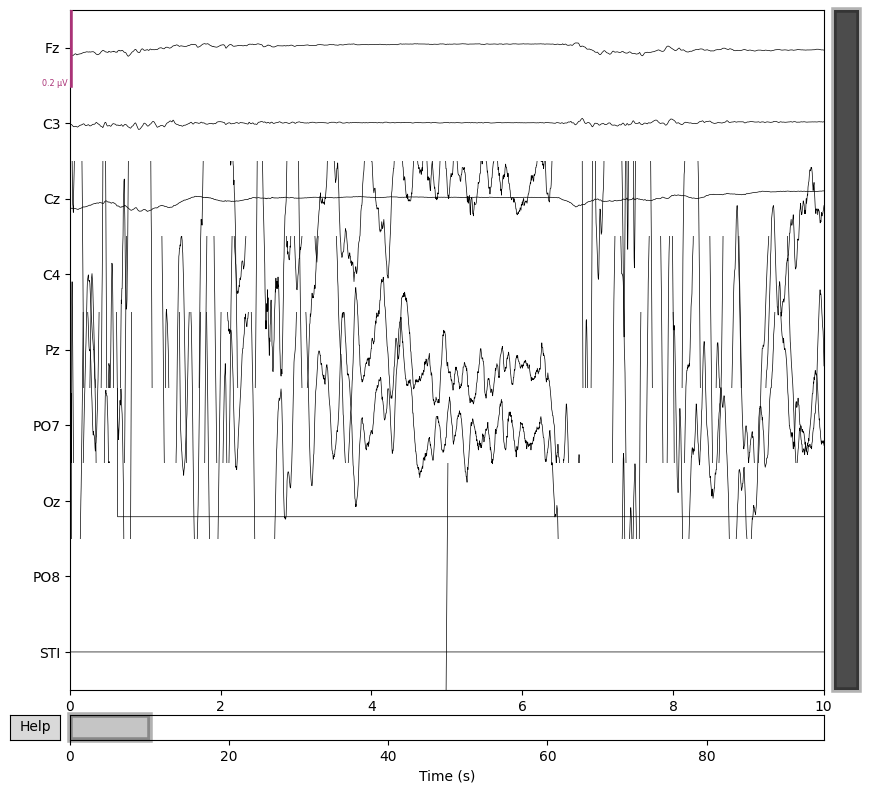

In [5]:
chs = ["Fz", "C3", "Cz", "C4", "Pz", "PO7", "Oz", "PO8"]
df = pd.read_csv(path, names=chs +["STIM"]) #use STIM only if you have a trigger
trigger = np.array(df.STIM)
eeg = df.iloc[:, 0:8].to_numpy()
fs = 250

amplify = 1e7 # amplification factor 
recompute = False # wether if changing trigger numerical values or not to avoid Event "0"

thisRec = RawArray(eeg.T/amplify, create_info(chs, fs, ch_types='eeg'))

# Get event indexes where value is not 0, i.e. -1 or 1
pos = np.nonzero(trigger)[0]

# Filter 0 values from the trigger array
y = trigger[trigger != 0]
print(pos, y)

# Create the stimuli channel
stim_data = np.zeros((1,thisRec.n_times))

# MNE works with absolute values of labels so -1 and +1 would result in only one kind of event
# that's why we add 2 and obtain 1 and 3 as label values
stim_data[0,pos] = (y + 2) if recompute else  y

print('stim_data = ', stim_data)
stim_raw = RawArray(stim_data, create_info(['STI'], thisRec.info['sfreq'], ch_types=['stim']))

# adding the stimuli channel (as a Raw object) to our EEG Raw object
thisRec.add_channels([stim_raw])

# Set the standard 10-20 montage
montage = make_standard_montage('standard_1020')
thisRec.set_montage(montage)

# Plot with adjusted scale (e.g., 1e-4 for EEG channels)
thisRec.plot(scalings={'eeg': 1e-7})
plt.show()